<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/9thWeekTask/CreditDataset_Regression%26Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv("sample_data/CreditDataset.csv")

In [4]:
# Misalkan kolom 'Target' adalah target, dan sisanya adalah fitur
X = df.drop(columns=['Class'])  # Menghapus kolom target untuk fitur
y = df['Class']  # Mengambil kolom target

In [5]:
# Menampilkan informasi dataset
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Nama fitur: {list(X.columns)}")
print(f"Nama target: {y.name}")


Jumlah sampel: 1000
Jumlah fitur: 20
Jumlah kelas: 2
Nama fitur: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']
Nama target: Class


# **Regression**

In [6]:
# Identifikasi dan ubah data non-numerik menjadi numerik
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

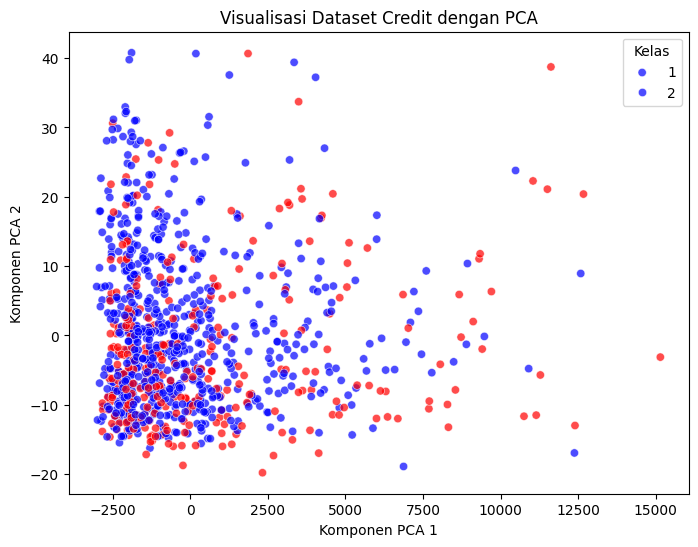

In [7]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("Visualisasi Dataset Credit dengan PCA")
plt.legend(title='Kelas', labels=['1', '2'])
plt.show()

In [8]:
# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


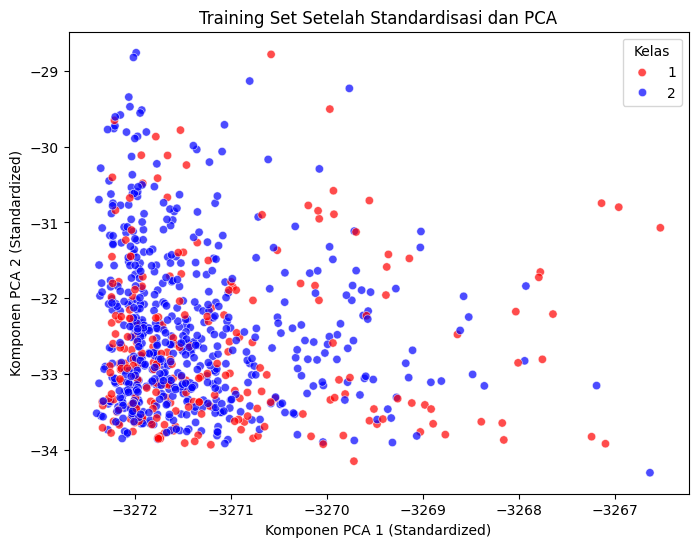

In [10]:
# Visualisasi data yang telah di-standardisasi dengan PCA
X_train_pca = pca.transform(X_train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7)
plt.xlabel("Komponen PCA 1 (Standardized)")
plt.ylabel("Komponen PCA 2 (Standardized)")
plt.title("Training Set Setelah Standardisasi dan PCA")
plt.legend(title='Kelas', labels=['1', '2'])
plt.show()

In [11]:
# Definisikan parameter grid untuk C, degree, gamma, dan coef0
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0, 1, 10]
}


In [12]:
# Inisialisasi SVM dengan kernel polinomial
svc = svm.SVC(kernel='poly')

In [13]:
# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'coef0': [0, 1, 10],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [14]:
# Menampilkan hasil Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'coef0': 1, 'degree': 4, 'gamma': 'auto'}
Best cross-validation accuracy: 0.765


In [15]:
# Menggunakan model terbaik dari Grid Search
best_clf = grid_search.best_estimator_

# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {accuracy:.2f}")

Akurasi pada data testing: 0.77


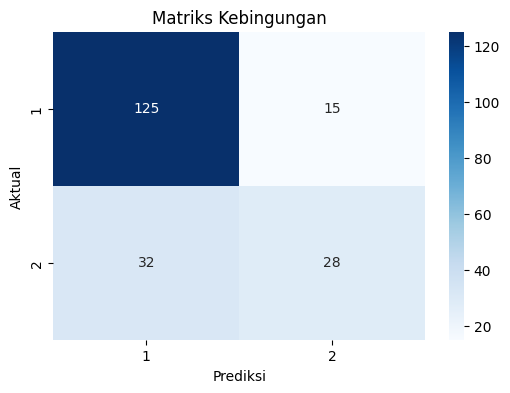

In [16]:
# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Mendapatkan label kelas unik dari y
class_labels = np.unique(y)

# Visualisasi matriks kebingungan
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Kebingungan")
plt.show()


In [17]:
# Menentukan nama kelas secara eksplisit
class_labels = ['1', '2']

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=class_labels))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.80      0.89      0.84       140
           2       0.65      0.47      0.54        60

    accuracy                           0.77       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200



In [18]:
# Kita akan menggunakan dua fitur utama dari PCA untuk visualisasi
# Definisikan ulang PCA untuk dua komponen
pca_vis = PCA(n_components=2)
X_train_pca_vis = pca_vis.fit_transform(X_train_scaled)
X_test_pca_vis = pca_vis.transform(X_test_scaled)

In [19]:
# Melatih ulang model dengan dua komponen PCA
svc_pca = svm.SVC(kernel='poly', C=grid_search.best_params_['C'],
                 degree=grid_search.best_params_['degree'],
                 gamma=grid_search.best_params_['gamma'],
                 coef0=grid_search.best_params_['coef0'])
svc_pca.fit(X_train_pca_vis, y_train)

SVC(C=0.1, coef0=1, degree=4, gamma='auto', kernel='poly')

In [20]:
# Membuat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca_vis[:, 0].min()-1, X_train_pca_vis[:, 0].max()+1, 500),
                     np.linspace(X_train_pca_vis[:, 1].min()-1, X_train_pca_vis[:, 1].max()+1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc_pca.decision_function(grid).reshape(xx.shape)


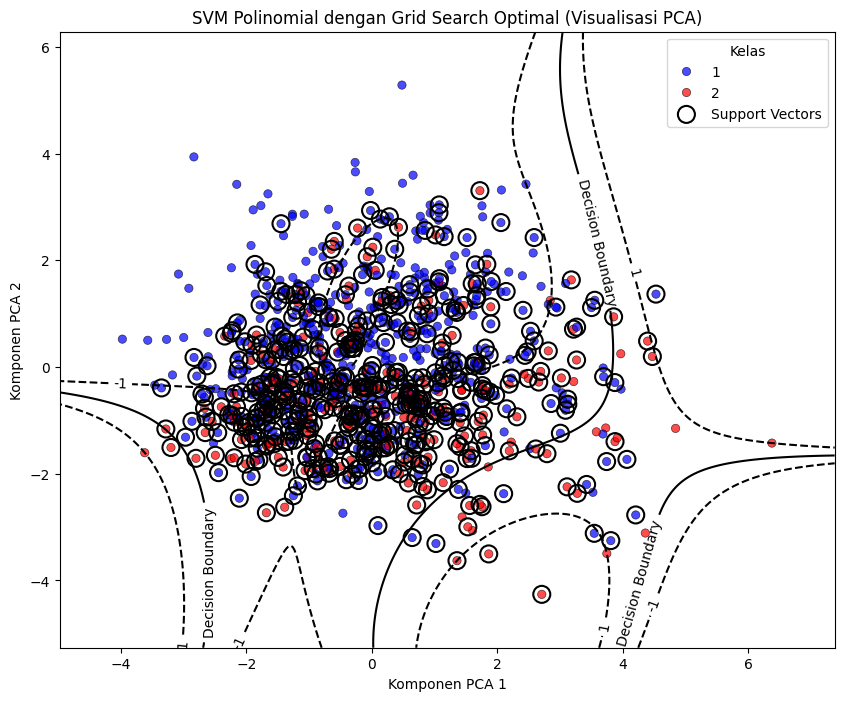

In [21]:
# Plotting
plt.figure(figsize=(10, 8))
# Plot decision boundary and margins
contour = plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.clabel(contour, fmt={-1: '-1', 0: 'Decision Boundary', 1: '1'}, inline=True, fontsize=10)
# Plot training points
sns.scatterplot(x=X_train_pca_vis[:, 0], y=X_train_pca_vis[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7, edgecolor='k')
# Menandai support vectors
support_vectors_pca = pca_vis.transform(best_clf.support_vectors_)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("SVM Polinomial dengan Grid Search Optimal (Visualisasi PCA)")
plt.legend(title='Kelas')
plt.show()


# **Classification**

In [22]:
# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# Melakukan scaling pada fitur
scaler = StandardScaler()

In [24]:
# Fitting scaler hanya pada data training
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
# Menggunakan scaler yang sudah fit untuk mentransformasi data testing
X_test_scaled = scaler.transform(X_test)

In [26]:
# Klasifikasi menggunakan SVM dengan kernel RBF
svc_rbf = svm.SVC(kernel='rbf')

In [27]:
# Grid Search untuk mencari parameter terbaik
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
}

In [28]:
grid_search_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rbf.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search
print("Best parameters for RBF kernel:", grid_search_rbf.best_params_)
print("Best cross-validation accuracy for RBF kernel:", grid_search_rbf.best_score_)

Best parameters for RBF kernel: {'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy for RBF kernel: 0.765


In [29]:
# Menggunakan model terbaik dari Grid Search
best_clf_rbf = grid_search_rbf.best_estimator_

In [30]:
# Prediksi pada data testing
y_pred_rbf = best_clf_rbf.predict(X_test_scaled)

In [31]:
# Evaluasi performa
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Akurasi pada data testing (RBF): {accuracy_rbf:.2f}")

Akurasi pada data testing (RBF): 0.76


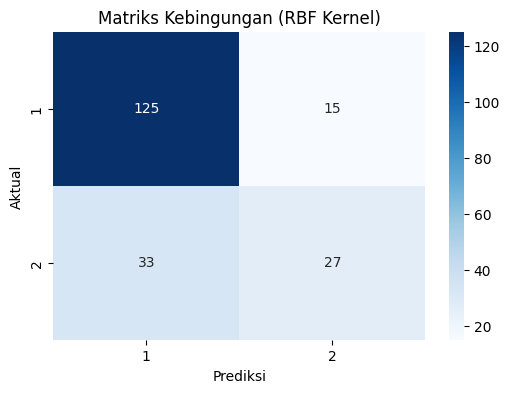

In [32]:
# Matriks kebingungan
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Visualisasi matriks kebingungan
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Kebingungan (RBF Kernel)")
plt.show()

In [33]:
# Laporan klasifikasi
print("Laporan Klasifikasi (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf, target_names=class_labels))

Laporan Klasifikasi (RBF Kernel):
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       140
           2       0.64      0.45      0.53        60

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.76      0.75       200



In [34]:
# Visualisasi dengan dua komponen PCA untuk klasifikasi
X_train_pca_vis_rbf = pca_vis.fit_transform(X_train_scaled)
X_test_pca_vis_rbf = pca_vis.transform(X_test_scaled)

In [35]:
# Melatih ulang model dengan dua komponen PCA
svc_rbf_pca = svm.SVC(kernel='rbf', C=grid_search_rbf.best_params_['C'], gamma=grid_search_rbf.best_params_['gamma'])
svc_rbf_pca.fit(X_train_pca_vis_rbf, y_train)

SVC(C=1)

In [36]:
# Membuat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca_vis_rbf[:, 0].min()-1, X_train_pca_vis_rbf[:, 0].max()+1, 500),
                     np.linspace(X_train_pca_vis_rbf[:, 1].min()-1, X_train_pca_vis_rbf[:, 1].max()+1, 500))
grid_rbf = np.c_[xx.ravel(), yy.ravel()]
Z_rbf = svc_rbf_pca.decision_function(grid_rbf).reshape(xx.shape)

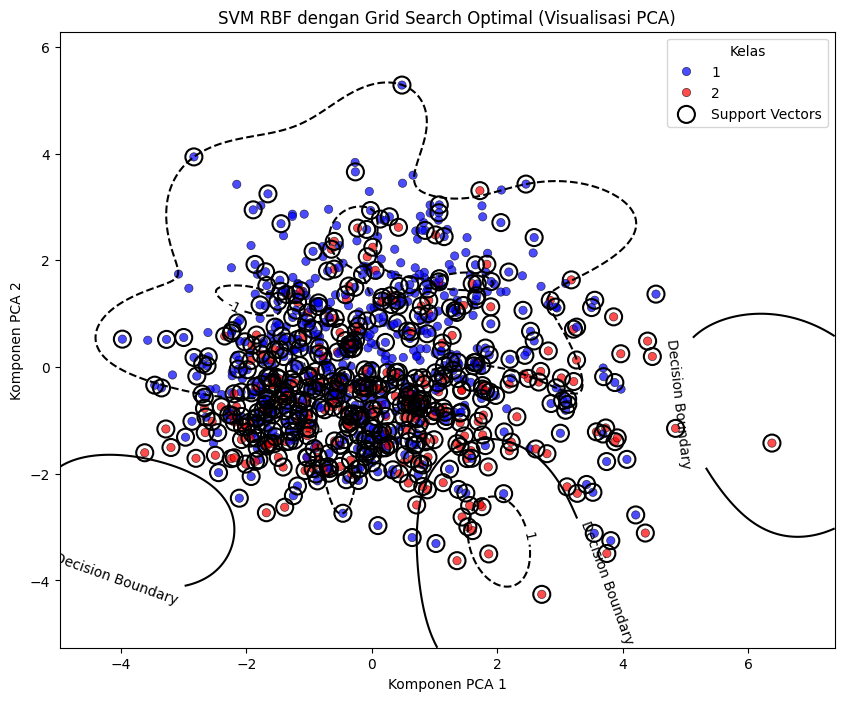

In [37]:
# Plotting
plt.figure(figsize=(10, 8))
# Plot decision boundary and margins
contour_rbf = plt.contour(xx, yy, Z_rbf, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.clabel(contour_rbf, fmt={-1: '-1', 0: 'Decision Boundary', 1: '1'}, inline=True, fontsize=10)
# Plot training points
sns.scatterplot(x=X_train_pca_vis_rbf[:, 0], y=X_train_pca_vis_rbf[:, 1], hue=y_train, palette=['blue', 'red'], alpha=0.7, edgecolor='k')
# Menandai support vectors
support_vectors_pca_rbf = pca_vis.transform(best_clf_rbf.support_vectors_)
plt.scatter(support_vectors_pca_rbf[:, 0], support_vectors_pca_rbf[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("SVM RBF dengan Grid Search Optimal (Visualisasi PCA)")
plt.legend(title='Kelas')
plt.show()